cluster
0    2465
4     862
2     432
3      97
1      52
Name: count, dtype: int64
Silhouette Score: 0.6339600194476261
    ProductoCodigo                                             Nombre  \
3              372                         COMBUSTIBLES Y LUBRICANTES   
48            1182                                         PILA AAA     
49            1184  PILA 9 VOLT                                   ...   
50            1185  PILA AA                                       ...   
64            1262  CORTADORA SENSITIVA MOD HYMS07 355MM          ...   

    ImpuestoId  Impuesto                   Descripcion  Activo  \
3            1    IVA 21  COMBUSTIBLES Y LUBRINCANTES.       1   
48           1    IVA 21                      PILA AAA       1   
49           2  IVA 10,5                           NaN       1   
50           1    IVA 21                           NaN       0   
64           2  IVA 10,5                           NaN       1   

    CuentaContableCodigo              Cuent

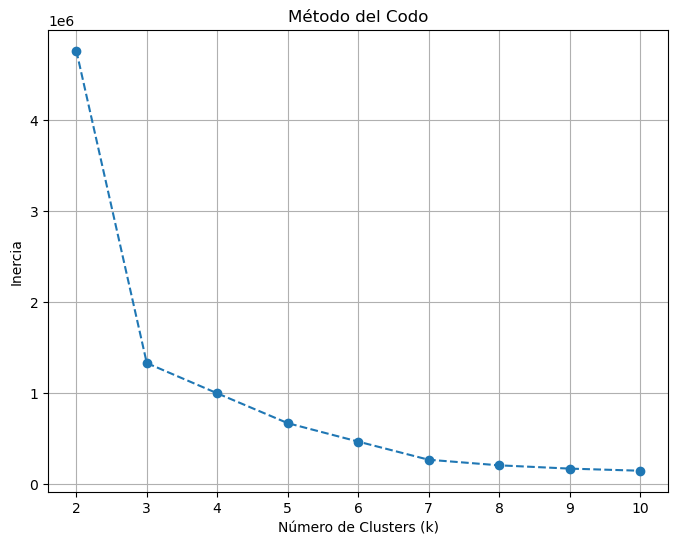

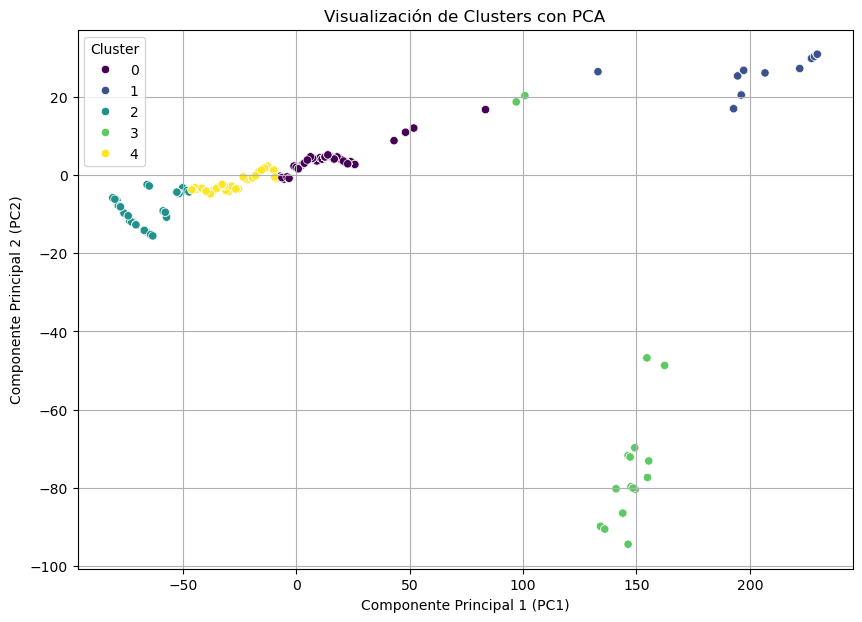

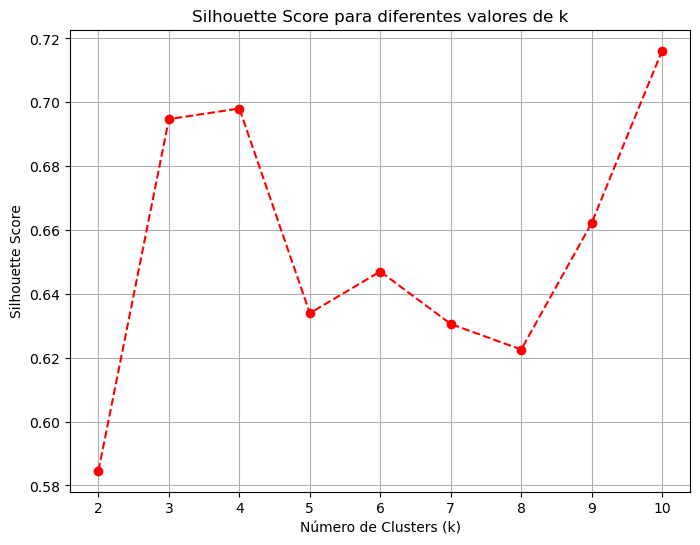

In [286]:
#Revisión de las nuevas clases o outliers
#En mi caso, donde me enfocas también en la detección de nuevas clases, puede ser que los datos desbalanceados incluyan
#clases que aún no se han identificado. 
#Aquí es donde entran los outliers o posibles anomalías que podrían representar nuevas clases.
#Para detectar nuevas clases potenciales, puedes utilizar técnicas como:

#Análisis de clustering: Esto  puede ayudar a encontrar grupos de datos que podrían ser candidatos para nuevas clases.
#Modelos de detección de outliers: Como Isolation Forest, LOF (Local Outlier Factor), que pueden identificar ejemplos que no se alinean bien con las clases existentes.
#Ejemplo de detección de nuevas clases usando clustering:

# K-means clustering
from sklearn.cluster import KMeans

features = data[['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']]  # Reemplaza con tus columnas

# Definir el número de clusters (k) - 

kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

# Asignar los clusters al dataset
data['cluster'] = kmeans.labels_

# Mostrar la cantidad de datos en cada cluster (posibles nuevas clases)

print(data['cluster'].value_counts())

#Análisis de las propiedades de los clusters::Calcula estadísticas descriptivas (media, mediana, etc.) para cada cluster.
#cluster_summary = data.groupby('cluster').mean()
#print(cluster_summary)

#Validación del número de clusters (k):
#Usa métricas como el codo (Elbow Method) o el silhouette score para confirmar que K es un número adecuado de clusters.
from sklearn.metrics import silhouette_score
print("Silhouette Score:", silhouette_score(features, kmeans.labels_))
#  si da entre 0.7 – 1.0: Excelente separación entre clusters. Los datos están bien agrupados.
#Exploración del Cluster 3 (el más pequeño):
cluster_3_data = data[data['cluster'] == 3]
print(cluster_3_data.head())


#Ejemplo para probar diferentes 𝑘

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    print(f"Silhouette Score para k={k}: {score}")
    
    
    # Importar las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar los valores de inercia
inertia = []

# Probar valores de k desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

#Visualización de Clusters en 2D con PCA
from sklearn.decomposition import PCA
import seaborn as sns

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Añadir los resultados de PCA al dataset
data['PC1'] = features_pca[:, 0]
data['PC2'] = features_pca[:, 1]

# Graficar los clusters en las dos primeras componentes principales 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='cluster', 
    palette='viridis', 
    data=data,
    legend='full'
)
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

#Silhouette Score para Diferentes Valores de k 
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Calcular el silhouette score para diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


Silhouette Score para k=3: 0.6947376951535524
cluster_3
0    2793
2     966
1     149
Name: count, dtype: int64


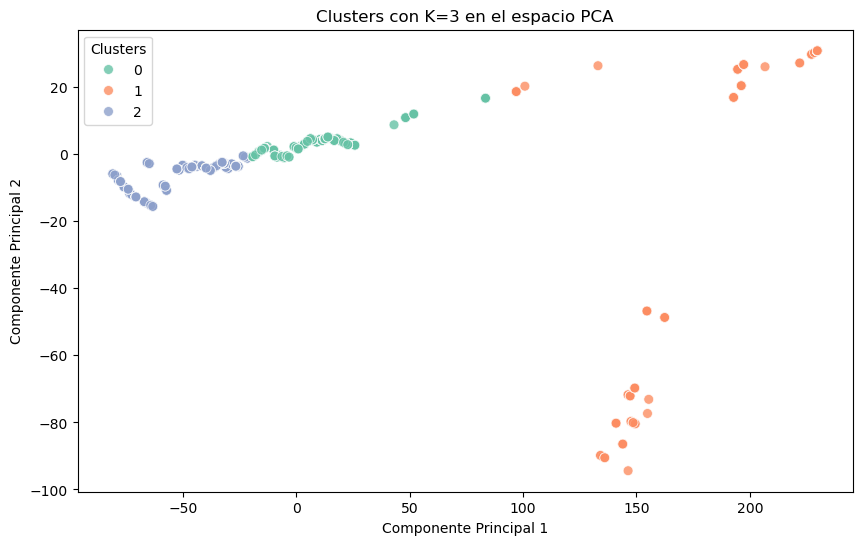

Silhouette Score para k=3: 0.6980509814387856
cluster_4
0    2793
2     966
3      97
1      52
Name: count, dtype: int64


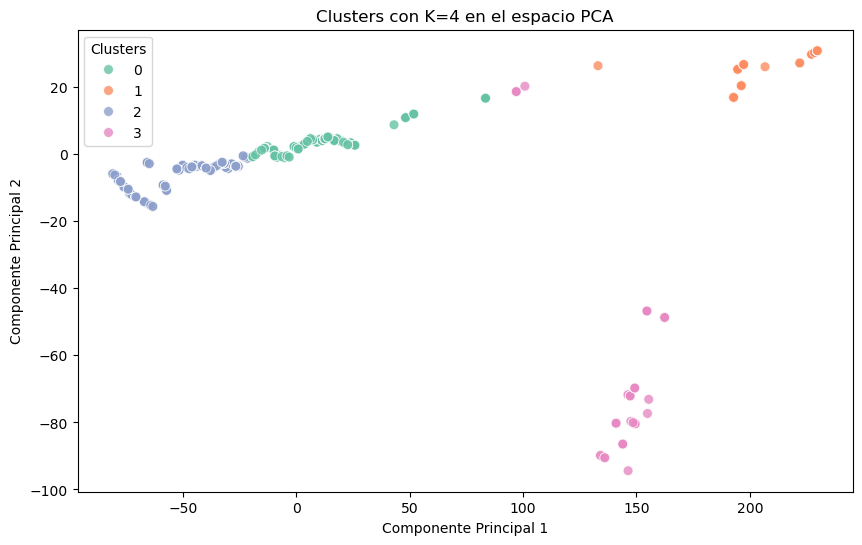

In [297]:
#k=3 y 4
# Ajustar K-Means con k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(features)
data['cluster_3'] = kmeans_3.labels_



# Calcular el Silhouette Score para k=3
silhouette_k3 = silhouette_score(features, kmeans_3.labels_)
print(f"Silhouette Score para k=3: {silhouette_k3}")

# Analizar los clusters
print(data['cluster_3'].value_counts())

# Visualización de los clusters con k=3
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_3', data=data,
    palette='Set2', s=50, alpha=0.8
)
plt.title("Clusters con K=3 en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()




# Ajustar K-Means con k=4
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(features)
data['cluster_4'] = kmeans_4.labels_



# Calcular el Silhouette Score para k=4
silhouette_k4 = silhouette_score(features, kmeans_4.labels_)
print(f"Silhouette Score para k=3: {silhouette_k4}")

# Analizar los clusters
print(data['cluster_4'].value_counts())

# Visualización de los clusters con k=4
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_4', data=data,
    palette='Set2', s=50, alpha=0.8
)
plt.title("Clusters con K=4 en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()








In [ ]:

# Graficar el método del codo
    
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar los valores de inercia
inertia = []

# Probar valores de k desde 2 hasta 10
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(2, 6))
plt.grid()
plt.show()
#cluster_summary_k3 = data.groupby('cluster_3').mean()
#print(cluster_summary_k3)


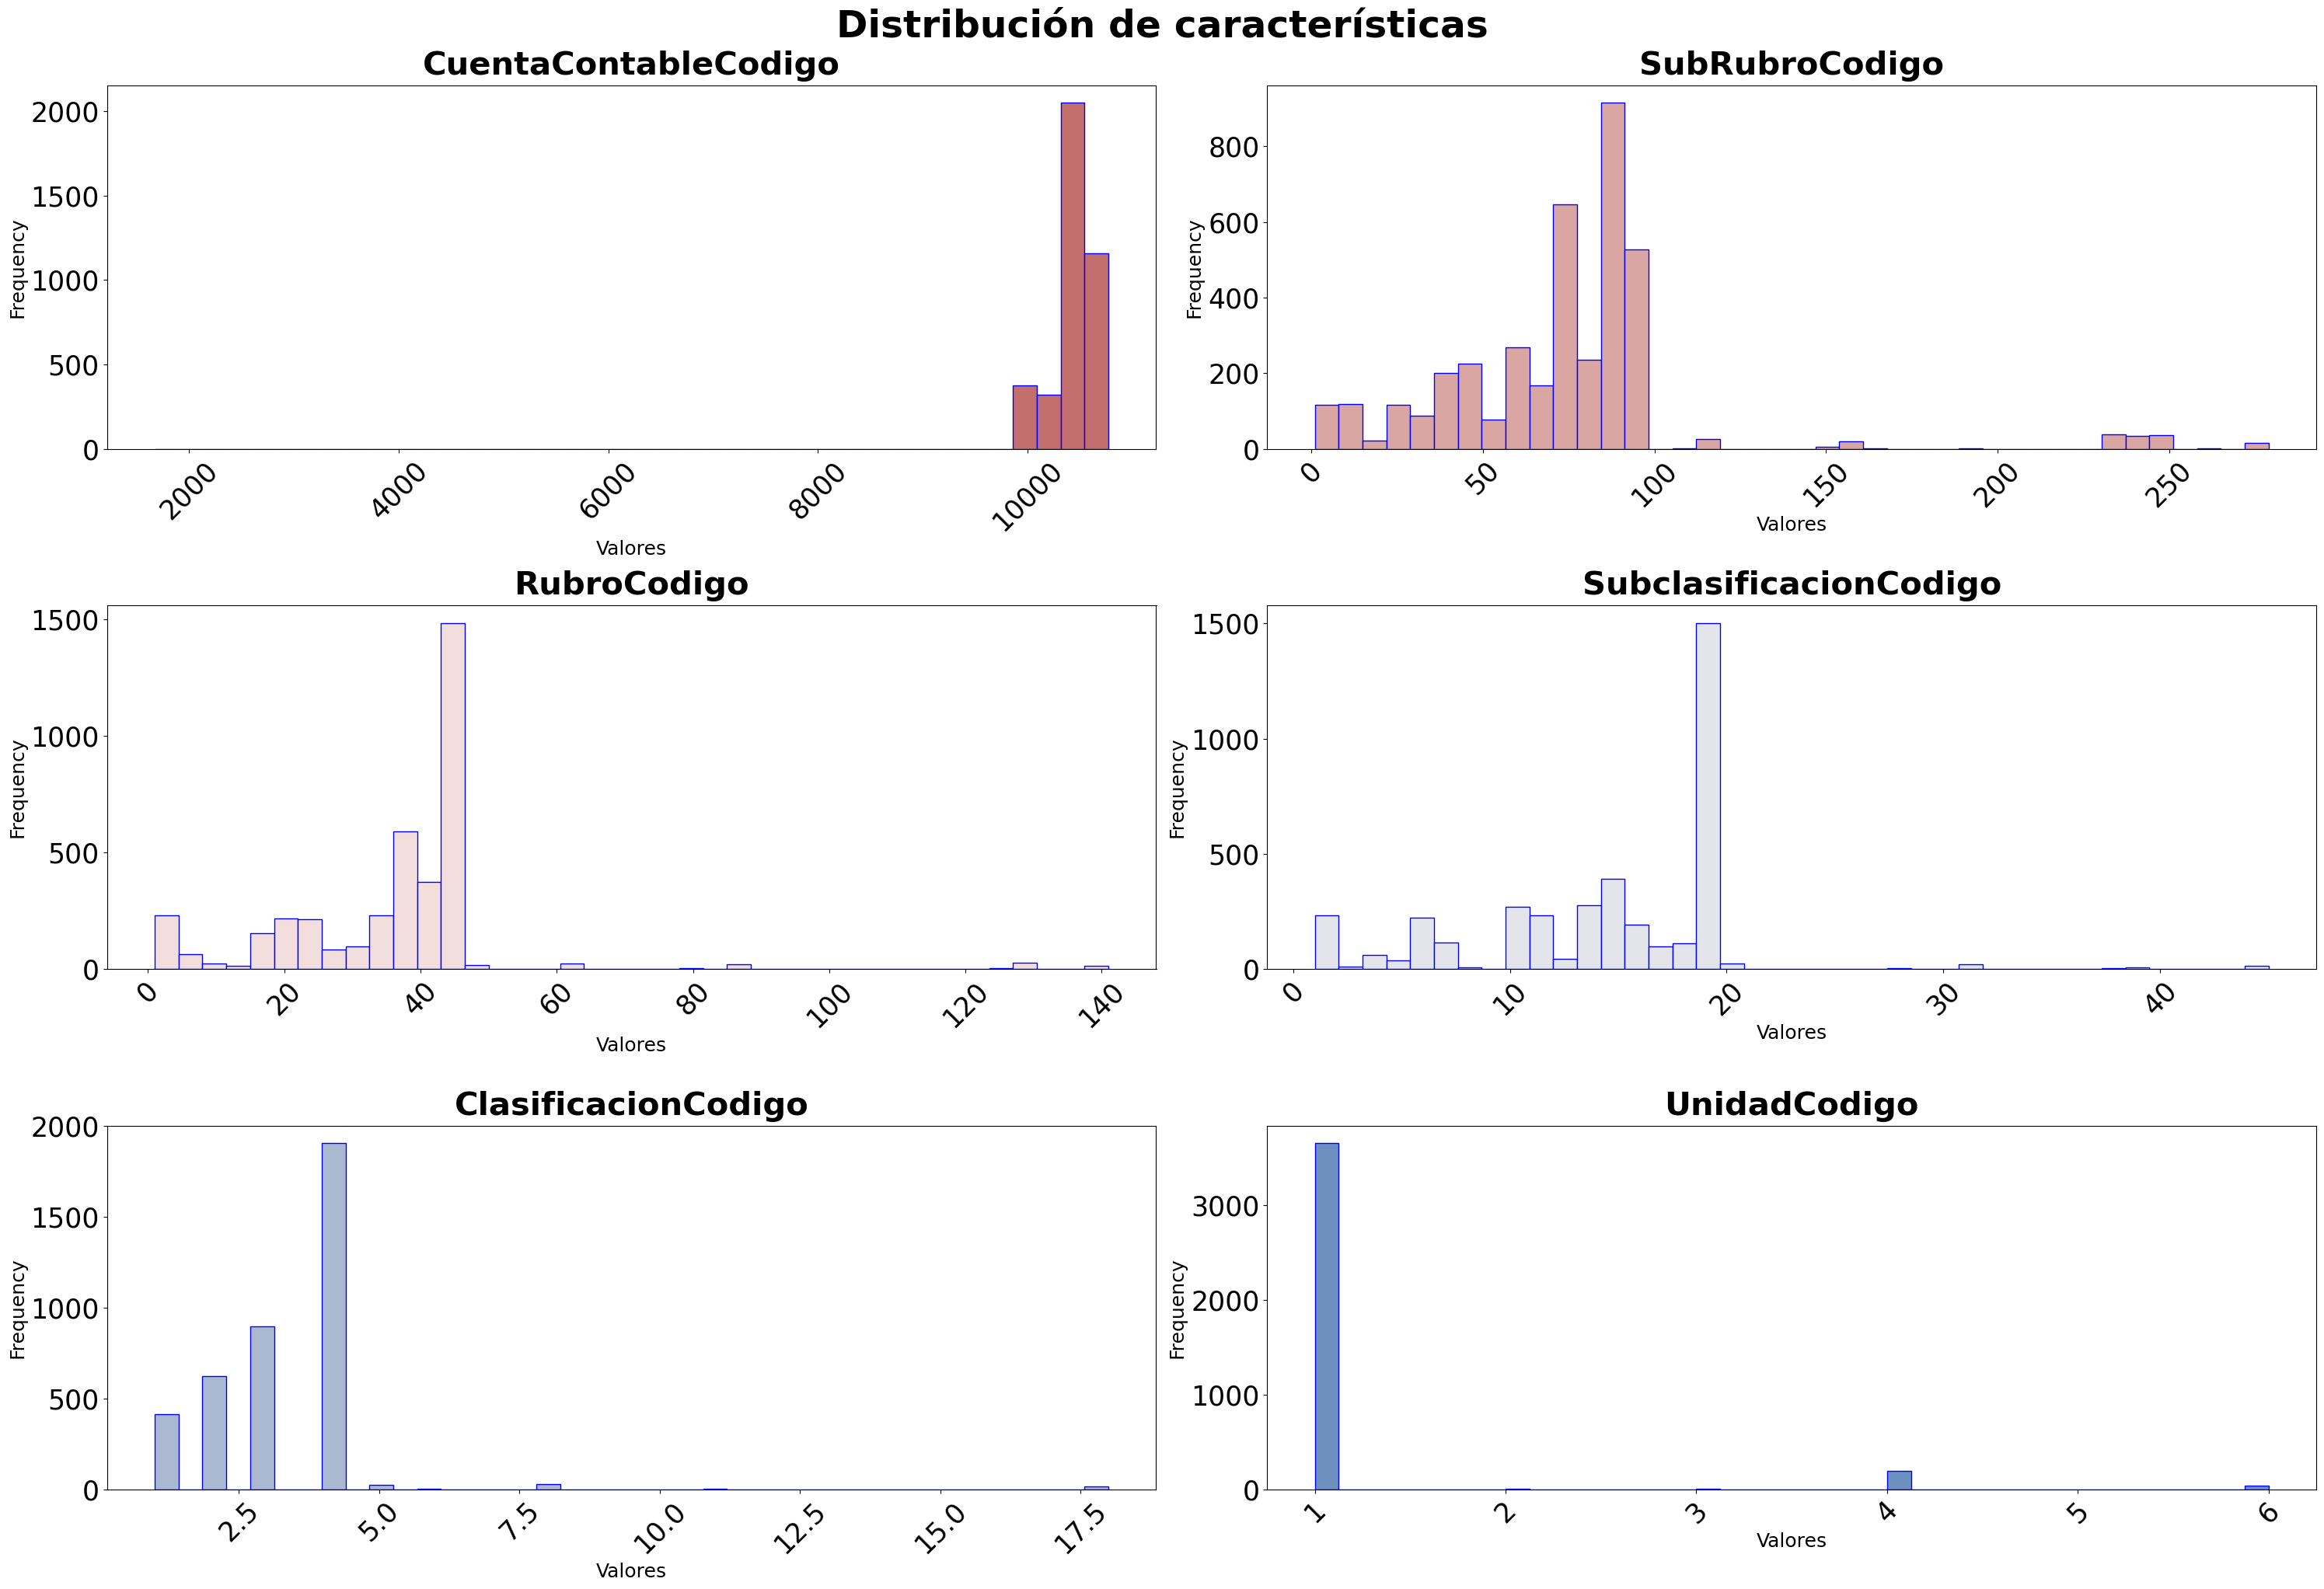

In [83]:
# Se muestra información de la distribución de las distintas características.
color=sns.color_palette("vlag_r")

columnas =  ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
        ]
# x_col = data[columnas]
# data[x_col].hist(bins=40, edgecolor='b', linewidth=1.0,
                        # #   xlabelsize=8, ylabelsize=8, grid=False, 
                         #  figsize=(16,6), color=color[0])    
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
# plt.suptitle('Caracteristicas', x=0.50, y=1.25, fontsize=14);  



# Crear histogramas individuales para cada columna
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

for i, col in enumerate(columnas):
    # Generar histograma para cada columna
    data[col].plot.hist(
        bins=40,
        edgecolor='b',
        linewidth=1.0,
        ax=axes[i],
        color=color[i % len(color)]  # Asignar colores de forma cíclica
    )
    
    axes[i].set_title(col, fontsize=30, fontweight='bold',pad=10)#  tamaño del título
   #  axes[i].tick_params(axis='both', labelsize=20)#  tamaño de etiqueta
    
     # Configurar etiquetas de los ejes
    axes[i].set_xlabel('Valores', fontsize=18)  # Etiqueta del eje x más legible
    axes[i].set_ylabel('Frequency', fontsize=18)  # Etiqueta del eje y más legible

    # Configurar valores de los ejes
    axes[i].tick_params(axis='x', labelsize=25, labelrotation=45)  # Valores del eje x más grandes y girados
    axes[i].tick_params(axis='y', labelsize=25)  # Valores del eje y más grandes



# Ajustar el diseño
plt.tight_layout()
plt.suptitle('Distribución de características', x=0.5, y=1.02, fontsize=35,fontweight='bold')
plt.show()

In [ ]:
import seaborn as sns

In [15]:
#pca
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_scaled_copia = data.copy()
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock']

data_seleccionada = data_scaled_copia[columnas]


# Paso 3: Aplicar PCA
pca = PCA(n_components=0.9)  # Retiene el 90% de la varianza
data_pca = pca.fit_transform(data_seleccionada)

# Paso 4: Crear DataFrame de las componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

print(data_pca_df.head())
#print(data_pca_df.head())
pca_componentes = pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(pca_componentes)

             PC1
0    -162.974853
1    -164.931334
2    -155.883538
3    -153.950419
4    -164.929009
...          ...
3903 -165.622169
3904 -165.938143
3905 -165.599206
3906 -165.599206
3907 -165.932683

[3908 rows x 1 columns]
     ImpuestoId        Activo  CuentaContableCodigo  SubRubroCodigo  \
0 -4.536941e-08  3.172265e-07             -0.000991       -0.000212   

   RubroCodigo  SubclasificacionCodigo  ClasificacionCodigo  UnidadCodigo  \
0    -0.000132               -0.000041            -0.000009      0.000011   

      Stock  
0  0.999999  


In [183]:
#PCA
#pca sacando mas caracteristicas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()
columnas =  ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]


# Paso 3: Aplicar PCA
pca = PCA(n_components=0.9)  # Retiene el 90% de la varianza
data_pca = pca.fit_transform(data_seleccionada)

# Paso 4: Crear DataFrame de las componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

print(data_pca_df)
#print(data_pca_df.head())
pca_componentes = pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(pca_componentes)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

             PC1
0      29.013938
1     -27.077426
2     -77.068555
3     -34.205218
4     -29.076340
...          ...
3903 -376.554722
3904  -27.108759
3905 -367.079036
3906 -367.079036
3907  -27.070168

[3908 rows x 1 columns]
   CuentaContableCodigo  SubRubroCodigo  RubroCodigo  Log_SubRubroCodigo  \
0              0.999991       -0.003186     0.002119            0.000057   

   SubclasificacionCodigo  ClasificacionCodigo  UnidadCodigo  
0                0.001987             0.000227      0.000079  


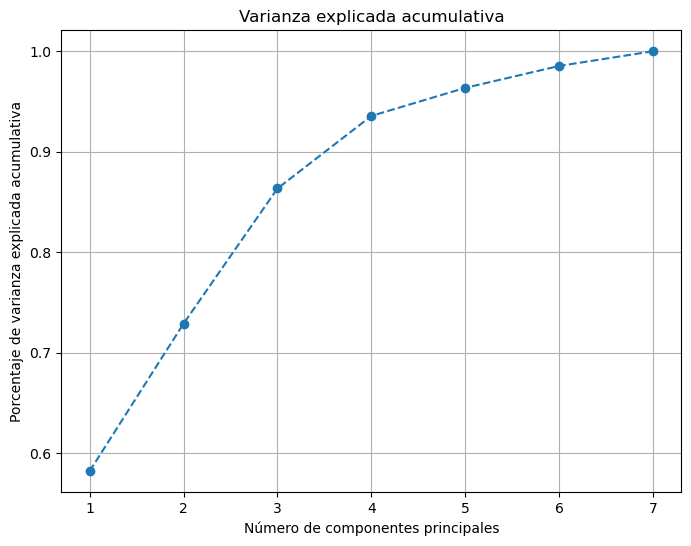

Contribuciones de las variables a los componentes principales:
                             PC1       PC2       PC3
CuentaContableCodigo    0.021614  0.863169 -0.488620
SubRubroCodigo          0.420632 -0.034468  0.143771
RubroCodigo             0.460531  0.053671  0.123128
Log_SubRubroCodigo      0.448474 -0.094920 -0.110679
SubclasificacionCodigo  0.448920  0.104511  0.047849
ClasificacionCodigo     0.426963  0.098315  0.128249
UnidadCodigo           -0.159865  0.470396  0.833327


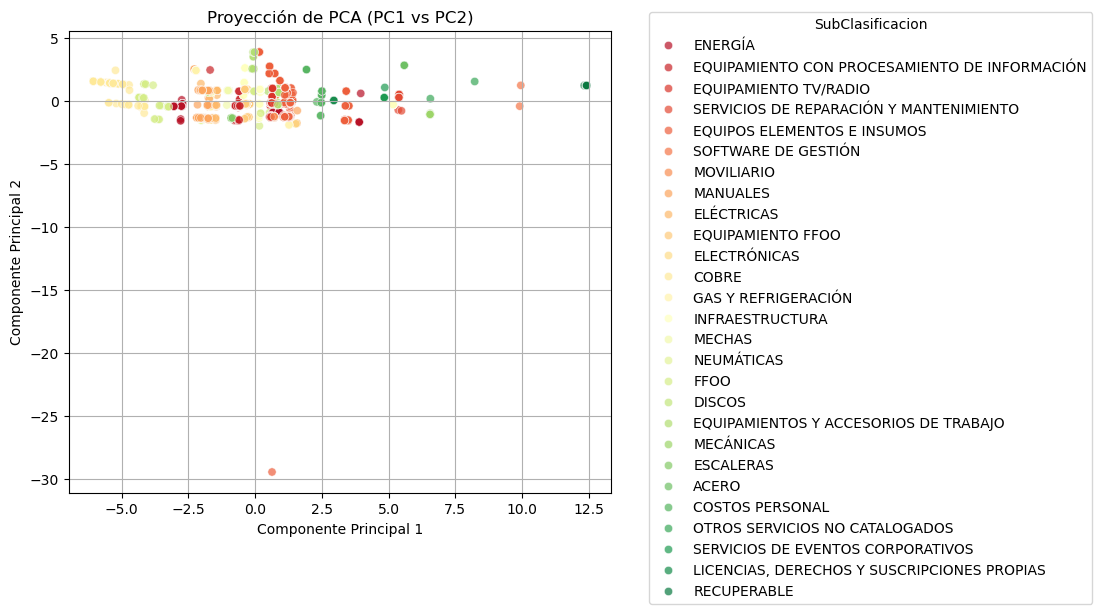

In [255]:
#PCA 1 
#desde cero PCA  -- gráficos incorporados en TESIS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()


# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

# Decidir cuántos componentes retener (por ejemplo, los primeros 3)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Mostrar las contribuciones de las variables
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=data_numeric.columns)
print("Contribuciones de las variables a los componentes principales:")
print(loadings)

# Visualizar la proyección en 2D (PC1 y PC2) 
plt.figure(figsize=(7, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Subclasificacion'], palette='RdYlGn', alpha=0.7)
plt.title("Proyección de PCA (PC1 vs PC2)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="SubClasificacion", bbox_to_anchor=(1.9, 0.4), loc='right')
plt.grid()
plt.show()

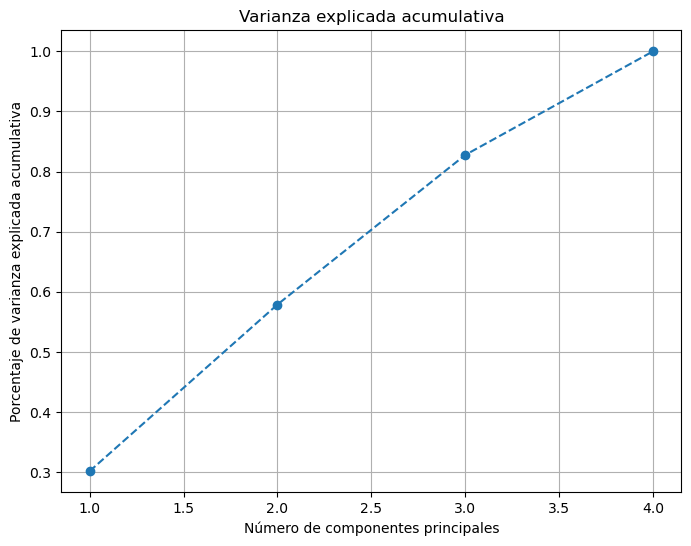

Contribuciones de las variables a los componentes principales:
                             PC1       PC2       PC3
SubRubroCodigo         -0.585518  0.506151  0.290413
RubroCodigo             0.756660  0.184537 -0.011201
SubclasificacionCodigo  0.175132 -0.192871  0.955630
ClasificacionCodigo     0.232298  0.820096  0.048027


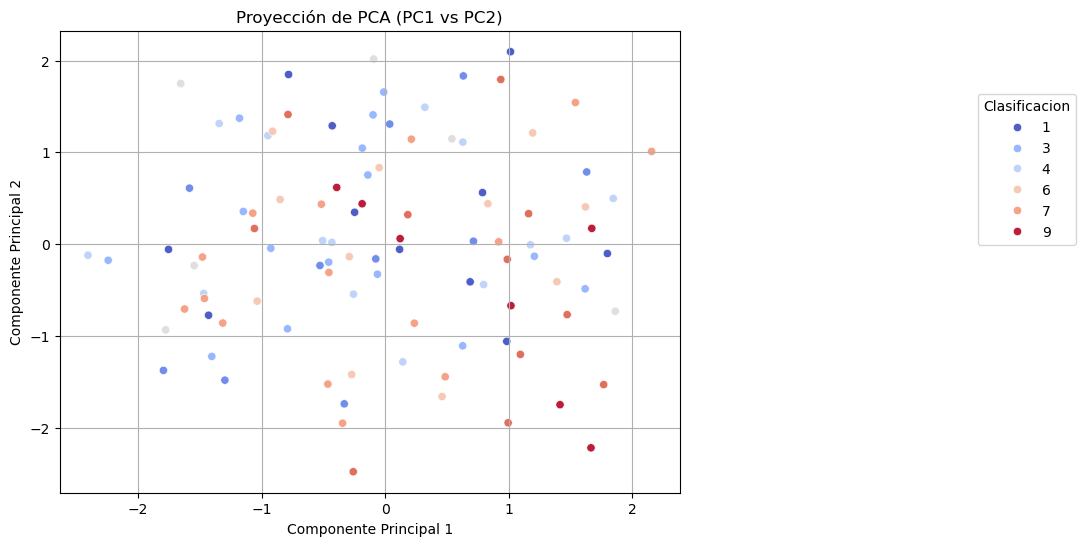

In [388]:
#no PCA 2 - Gráficos incorporado en  TESIS
 
#desde cero PCA  -- fue a TESIS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()


# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

# Decidir cuántos componentes retener (por ejemplo, los primeros 3)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Mostrar las contribuciones de las variables
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=data_numeric.columns)
print("Contribuciones de las variables a los componentes principales:")
print(loadings)

# Visualizar la proyección en 2D (PC1 y PC2) otros paletas de colores:viridis -RdYlGn 
plt.figure(figsize=(8, 6))
#si no quiero que tenga leyenda:









[[-2.54556645  0.18756741]
 [-0.80281421 -0.16973066]
 [ 0.476669   -0.28617574]
 ...
 [ 0.9822427  -1.41189003]
 [ 0.9822427  -1.41189003]
 [ 0.01561989 -0.10380904]]
   CuentaContableCodigo  SubRubroCodigo  RubroCodigo  SubclasificacionCodigo  \
0              0.031102        0.460758     0.524987                0.510669   
1              0.992593       -0.105668    -0.025864                0.053457   

   ClasificacionCodigo  
0             0.500340  
1             0.008185  


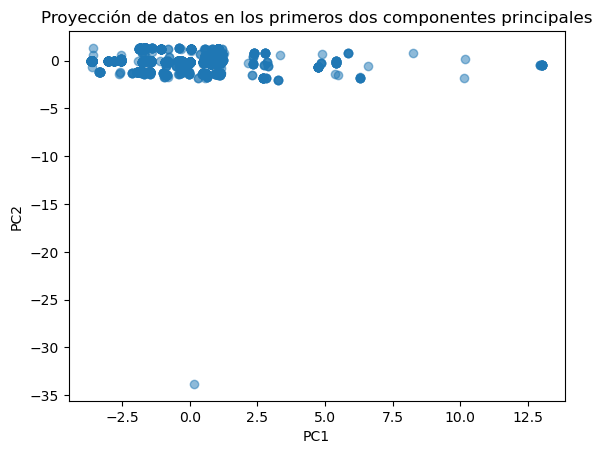

In [382]:
#nueva implementacion de pca 
from sklearn.preprocessing import StandardScaler

# Escalar los datos
from sklearn.decomposition import PCA
columnas=['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]
data_scaled = StandardScaler().fit_transform(data_seleccionada)

from sklearn.decomposition import PCA

# PCA con SVD
pca = PCA(n_components=2)  # Número de componentes deseados
data_pca = pca.fit_transform(data_scaled)
pca_componentes= pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(data_pca)
print(pca_componentes)

import matplotlib.pyplot as plt




plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección de datos en los primeros dos componentes principales')


plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que `data_pca` es el dataset reducido con PCA
# y tiene el mismo número de filas que `data`

lof = LocalOutlierFactor(n_neighbors=20)

# Ajustar LOF y predecir outliers
outliers = lof.fit_predict(data_pca)

# Agregar los resultados de outliers al DataFrame original
# Asegúrate de que data y data_pca tengan la misma longitud
if len(data) == len(data_pca):
    data['Outlier'] = (outliers == -1).astype(int)  # Convertir -1 a 1 para outliers
    data['LOF_Score'] = lof.negative_outlier_factor_  # Agregar los puntajes LOF
else:
    raise ValueError("El número de filas de data y data_pca no coincide.")

# Separar datos normales y outliers
normal_data = data_pca[data['Outlier'] == 0]
outlier_data = data_pca[data['Outlier'] == 1]

# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContable', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', alpha=0.6, label='Normal')
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', alpha=0.6, label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Outliers con LOF')
plt.legend()
plt.show()


In [381]:
#aplico LOF con pca -- va a tesis------------------------------------
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(data_pca)

# Identificar outliers
data['outlier'] = (outliers == -1)

# Separar datos normales y outliers
normal_data = data_pca[data['outlier'] == False]
outlier_data = data_pca[data['outlier'] == True]

# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContable', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', alpha=0.6, label='Normal')
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', alpha=0.6, label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Outliers con LOF')
plt.legend()
plt.show()

ValueError: Length of values (3908) does not match length of index (100)

In [383]:
data.head(5)

,RubroCodigo,SubRubroCodigo,ClasificacionCodigo,SubclasificacionCodigo,Stock,cluster_dbscan,Outlier,target13,PC1,PC2
0,2,5,9,3,199,-1,1,Anómalo,-3.953972,1.261719
1,2,6,5,3,323,-1,0,Anómalo,-3.508733,-2.745669
2,1,12,10,8,443,0,0,Normal,3.143018,1.126630
3,3,18,2,7,69,-1,0,Anómalo,7.790109,-6.926486
4,5,15,9,9,301,-1,1,Anómalo,5.568576,0.579771


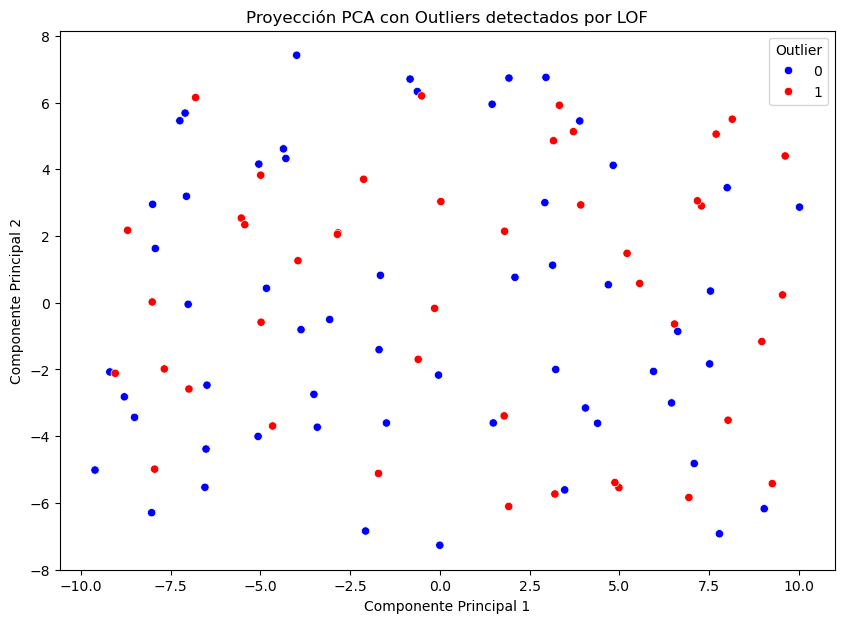

Número de outliers detectados: 44


In [380]:
#NO
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya seleccionaste las columnas numéricas relevantes
columnas_relevantes  =['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegúrate de no tener valores nulos
data_seleccionada = data_seleccionada.dropna()

# Aplicar PCA para reducir a dos componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_seleccionada)

# Agregar las componentes principales al DataFrame original
data['PC1'] = componentes_principales[:, 0]
data['PC2'] = componentes_principales[:, 1]


# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Outlier', 
    data=data, 
    palette={0: 'blue', 1: 'red'}
)
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Outlier", loc='best')
plt.show()

 



In [379]:
#lof solo
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu dataset cargado previamente.
# Selección de las columnas relevantes (numéricas) para LOF.
columnas_relevantes = ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegurarnos de que no haya valores nulos en las columnas seleccionadas
data_seleccionada = data_seleccionada.dropna()

# Aplicación de LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Ajusta n_neighbors según el tamaño del dataset
outlier_scores = lof.fit_predict(data_seleccionada)

# Agregar resultados al dataset original
data['LOF_Score'] = lof.negative_outlier_factor_  # El puntaje negativo indica qué tan 'outlier' es cada punto
data['Outlier'] = np.where(outlier_scores == -1, 1, 0)  # -1 indica un outlier



# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContableCodigo', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))


import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Outlier', data=data, palette={0: 'blue', 1: 'red'})
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.show()


KeyError: "['CuentaContableCodigo'] not in index"

In [12]:

data_scaled_copia = data.copy()
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','MovimientosStock','MovimientoCantidad']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]
print(data_seleccionada.isnull().sum())


ImpuestoId                  0
Activo                      0
CuentaContableCodigo        0
SubRubroCodigo              0
RubroCodigo                 0
SubclasificacionCodigo      0
ClasificacionCodigo         0
UnidadCodigo                0
Stock                       0
MovimientosStock          787
MovimientoCantidad        787
dtype: int64
